### Importing Necessary Modules

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
from sklearn.metrics import confusion_matrix

# Load Dataset

In [2]:
df = pd.read_csv('../../datasets/PCOS_clean_data_without_infertility.csv')
df.head(12)

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.30,15,78,22,10.48,0,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.92,15,74,20,11.70,0,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.27,11,72,18,11.80,0,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.67,13,72,20,12.00,0,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.06,11,72,18,10.00,0,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
5,0,36,74.1,165.0,27.22,15,78,28,11.20,0,...,0,0.0,0,110,70,9,6,16.0,20.0,8.0
6,0,34,64.0,156.0,26.30,11,72,18,10.90,0,...,0,0.0,0,120,80,6,6,15.0,16.0,6.8
7,0,33,58.5,159.0,23.14,13,72,20,11.00,0,...,0,0.0,0,120,80,7,6,15.0,18.0,7.1
8,0,32,40.0,158.0,16.02,11,72,18,11.80,0,...,0,0.0,0,120,80,5,7,17.0,17.0,4.2
9,0,36,52.0,150.0,23.11,15,80,20,10.00,1,...,0,0.0,0,110,80,1,1,14.0,17.0,2.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              538 non-null    int64  
 1   Age (yrs)               538 non-null    int64  
 2   Weight (Kg)             538 non-null    float64
 3   Height(Cm)              538 non-null    float64
 4   BMI                     538 non-null    float64
 5   Blood Group             538 non-null    int64  
 6   Pulse rate(bpm)         538 non-null    int64  
 7   RR (breaths/min)        538 non-null    int64  
 8   Hb(g/dl)                538 non-null    float64
 9   Cycle(R/I)              538 non-null    int64  
 10  Cycle length(days)      538 non-null    int64  
 11  Marraige Status (Yrs)   538 non-null    float64
 12  Pregnant(Y/N)           538 non-null    int64  
 13  No. of aborptions       538 non-null    int64  
 14  I   beta-HCG(mIU/mL)    538 non-null    fl

## Feature Selection For Dependant & Independant Variable

In [4]:
X = df.drop(["PCOS (Y/N)",
            "Blood Group",
            "Height(Cm)",
            "Pregnant(Y/N)",
             "PRG(ng/mL)",
            "RR (breaths/min)",
            "No. of aborptions",
            "FSH/LH",
            "I   beta-HCG(mIU/mL)",
            "II    beta-HCG(mIU/mL)",
            "TSH (mIU/L)",
            "FSH(mIU/mL)",
            "LH(mIU/mL)",
            "Waist:Hip Ratio",
            "PRL(ng/mL)",
            "BP _Diastolic (mmHg)",
            "BP _Systolic (mmHg)",
            "Reg.Exercise(Y/N)",
            "RBS(mg/dl)"
            ],axis=1)

In [5]:
y = df[["PCOS (Y/N)"]]

In [6]:
X.shape

(538, 23)

In [7]:
y.shape

(538, 1)

# Testing Function

In [8]:
def test_results(model, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accuracy = (tp + tn)/(tp + fp + tn + fn)
    print("Accuracy: ", '{:.2f}'.format(accuracy * 100))
    print("True Negative:", tn)
    print("True Positve:", tp)
    print("False Positive:", fp)
    print("False Negative:", fn)
    print()
    print("-------------------------------------------------------")
    print("Negative Class Results")
    precision = (tp / (tp + fp)) 
    recall =  (tp  / (tp + fn)) 
    f1_score = (2 * (precision * recall) / (precision + recall)) 
    print("Precision (N): ", '{:.2f}'.format(precision * 100))
    print("Recall (N): ", '{:.2f}'.format(recall * 100))
    print("F1 Score (N):" ,  '{:.2f}'.format(f1_score * 100))
    print()
    print("-------------------------------------------------------")
    print("Positive Class Results")
    precision = (tn / (tn + fn))
    recall =  (tn  / (tn + fp))
    f1_score = (2 * (precision * recall) / (precision + recall))
    print("Precision (P): ", '{:.2f}'.format(precision * 100))
    print("Recall (P): ", '{:.2f}'.format(recall * 100))
    print("F1 Score (P):" , '{:.2f}'.format(f1_score * 100))

## Confusion Matrix Visualizer

In [9]:
from yellowbrick.classifier import confusion_matrix

def vis_conf(model, X_test, y_test):
    plt.figure(figsize=(6, 5))
    visualizer = confusion_matrix(
        model,
        X_test, y_test,
        is_fitted=True,
        classes=['Negative', 'Positive']
    )
    visualizer.show();

# Data Augmentation

## Resampling on Complete Dataset

In [10]:
from imblearn.combine import SMOTEENN

resample = SMOTEENN(sampling_strategy=1/1, random_state =0)
X, y = resample.fit_sample(X, y)

## Splitting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify= y)

## Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)


# Setting Column Names from dataset
X_train.columns = X.columns
X_test.columns = X.columns

## Resampling on Training Dataset Only

In [13]:
# from imblearn.over_sampling import SMOTE, ADASYN

# resample = ADASYN(sampling_strategy='auto', random_state =0)
# X_train, y_train = resample.fit_sample(X_train, y_train)

## Shape of Final Training Testing Set

In [14]:
X_train.shape

(383, 23)

In [15]:
X_test.shape

(96, 23)

In [16]:
X.shape

(479, 23)

# ML Models

## SVM

In [17]:
from sklearn.svm import SVC

In [18]:
svm = SVC(kernel="linear", gamma='auto', probability= True, random_state=0)

In [19]:
svm.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', probability=True, random_state=0)

In [20]:
test_results(svm, X_test, y_test)

Accuracy:  93.75
True Negative: 38
True Positve: 52
False Positive: 4
False Negative: 2

-------------------------------------------------------
Negative Class Results
Precision (N):  92.86
Recall (N):  96.30
F1 Score (N): 94.55

-------------------------------------------------------
Positive Class Results
Precision (P):  95.00
Recall (P):  90.48
F1 Score (P): 92.68


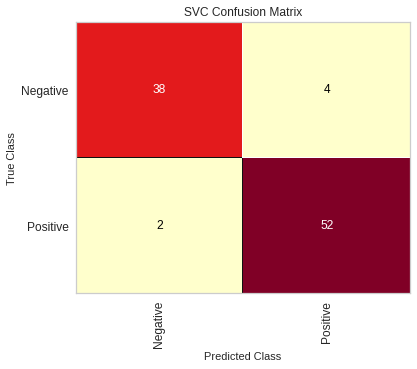

In [21]:
vis_conf(svm, X_test, y_test)

In [22]:
# cv = StratifiedKFold(
#     n_splits=15,random_state=0,
#     shuffle=True
# ) 
# visualizer = CVScores(svm, cv=cv, scoring='f1_weighted', is_fitted=False, stratify = True)
# visualizer.fit(X, y)        # Fit the data to the visualizer
# visualizer.show()           # Finalize and render the figure

## KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors= 9, p = 1, metric= 'minkowski')

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [26]:
test_results(knn, X_test, y_test)

Accuracy:  87.50
True Negative: 32
True Positve: 52
False Positive: 10
False Negative: 2

-------------------------------------------------------
Negative Class Results
Precision (N):  83.87
Recall (N):  96.30
F1 Score (N): 89.66

-------------------------------------------------------
Positive Class Results
Precision (P):  94.12
Recall (P):  76.19
F1 Score (P): 84.21


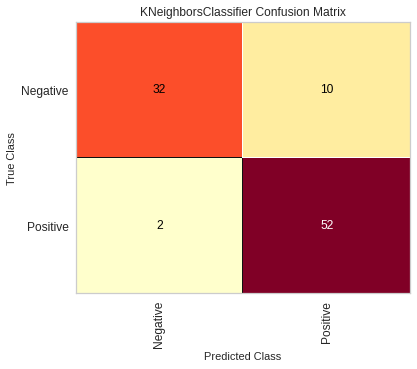

In [27]:
vis_conf(knn, X_test, y_test)

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(n_estimators=1500, criterion="entropy", random_state=0) 

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1500, random_state=0)

In [31]:
test_results(rf, X_test, y_test)

Accuracy:  92.71
True Negative: 37
True Positve: 52
False Positive: 5
False Negative: 2

-------------------------------------------------------
Negative Class Results
Precision (N):  91.23
Recall (N):  96.30
F1 Score (N): 93.69

-------------------------------------------------------
Positive Class Results
Precision (P):  94.87
Recall (P):  88.10
F1 Score (P): 91.36


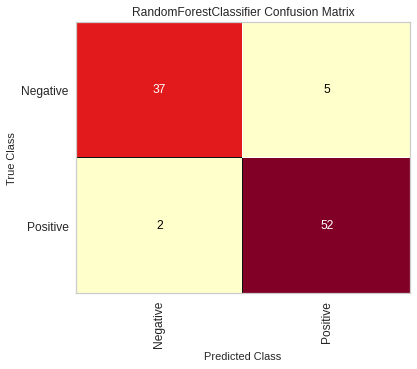

In [32]:
vis_conf(rf, X_test, y_test)

In [33]:
# cv = StratifiedKFold(
#     n_splits=15,random_state=0,
#     shuffle=True
# ) 
# visualizer = CVScores(rf, cv=cv, scoring='f1_weighted', is_fitted=False, stratify = True)
# visualizer.fit(X, y)        # Fit the data to the visualizer
# visualizer.show()           # Finalize and render the figure

## Adaboost

In [34]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier

In [35]:
ada = AdaBoostClassifier(n_estimators= 11, random_state=0)

In [36]:
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=11, random_state=0)

In [37]:
test_results(ada, X_test, y_test)

Accuracy:  92.71
True Negative: 36
True Positve: 53
False Positive: 6
False Negative: 1

-------------------------------------------------------
Negative Class Results
Precision (N):  89.83
Recall (N):  98.15
F1 Score (N): 93.81

-------------------------------------------------------
Positive Class Results
Precision (P):  97.30
Recall (P):  85.71
F1 Score (P): 91.14


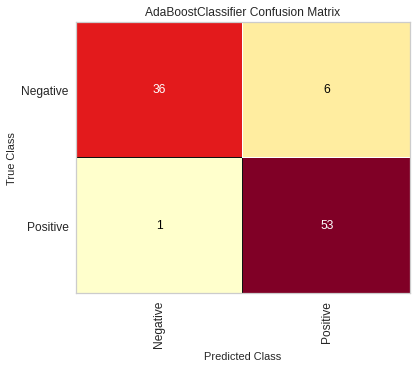

In [38]:
vis_conf(ada, X_test, y_test)

## XgBoost

In [39]:
import xgboost as xgb

In [40]:
xgb = xgb.XGBClassifier(max_depth=5, n_estimators=1500, learning_rate=0.3,scale_pos_weight=10,
                            random_state= 0, n_jobs=-1)

## Cross Validation

In [41]:
sum(cross_val_score(xgb, X, y, cv=10))/10

0.9603280141843971

## Final Model Build

In [42]:
xgb = xgb.fit(X_train, y_train)

In [43]:
test_results(xgb, X_test, y_test)

Accuracy:  95.83
True Negative: 39
True Positve: 53
False Positive: 3
False Negative: 1

-------------------------------------------------------
Negative Class Results
Precision (N):  94.64
Recall (N):  98.15
F1 Score (N): 96.36

-------------------------------------------------------
Positive Class Results
Precision (P):  97.50
Recall (P):  92.86
F1 Score (P): 95.12


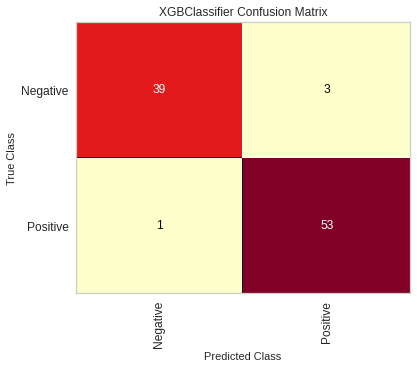

In [44]:
vis_conf(xgb, X_test, y_test)

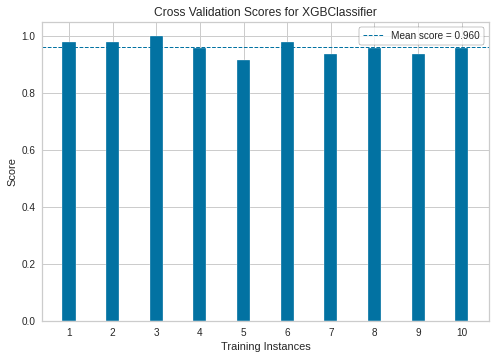

In [45]:
cv = StratifiedKFold(
    n_splits=10,random_state=0,
    shuffle=False
) 
visualizer = CVScores(xgb, cv=cv, scoring='f1_weighted', is_fitted=True, stratify = True)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## Naive Bayes'

In [46]:
from sklearn.naive_bayes import ComplementNB, GaussianNB, MultinomialNB

In [47]:
nb = GaussianNB()

In [48]:
nb.fit(X_train, y_train)

GaussianNB()

In [49]:
test_results(nb, X_test, y_test)

Accuracy:  93.75
True Negative: 39
True Positve: 51
False Positive: 3
False Negative: 3

-------------------------------------------------------
Negative Class Results
Precision (N):  94.44
Recall (N):  94.44
F1 Score (N): 94.44

-------------------------------------------------------
Positive Class Results
Precision (P):  92.86
Recall (P):  92.86
F1 Score (P): 92.86


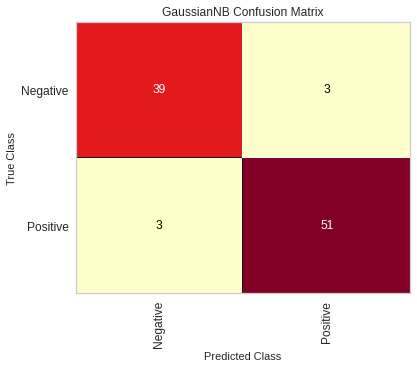

In [50]:
vis_conf(nb, X_test, y_test)

## MLP

In [51]:
from sklearn.neural_network import MLPClassifier

In [52]:
mlp = MLPClassifier(hidden_layer_sizes=(60, 60), activation='tanh', solver='adam', alpha=0.0001, learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=False, random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [53]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(60, 60),
              learning_rate='adaptive', random_state=0, shuffle=False)

In [54]:
test_results(mlp, X_test, y_test)

Accuracy:  92.71
True Negative: 37
True Positve: 52
False Positive: 5
False Negative: 2

-------------------------------------------------------
Negative Class Results
Precision (N):  91.23
Recall (N):  96.30
F1 Score (N): 93.69

-------------------------------------------------------
Positive Class Results
Precision (P):  94.87
Recall (P):  88.10
F1 Score (P): 91.36


1    270
0    209
Name: PCOS (Y/N), dtype: int64


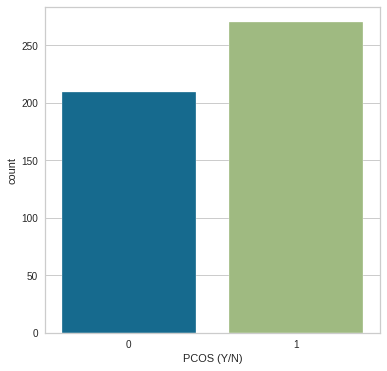

In [55]:
print(y['PCOS (Y/N)'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='PCOS (Y/N)',
    data=y
);